In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Cricket.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
df_model = df[['Player', 'Ave', 'SR']]

In [8]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
Player    79 non-null object
Ave       79 non-null float64
SR        79 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [9]:
df_model.describe()

,Ave,SR
count,79.000000,79.000000
mean,38.523291,79.295316
std,5.919093,9.925307
min,23.570000,60.570000
25%,34.600000,73.725000
50%,37.870000,77.730000
75%,41.845000,85.180000
max,53.940000,117.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x165fb1324a8>,
 'caps': [<matplotlib.lines.Line2D at 0x165fa7e4cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165fb1329e8>],
 'medians': [<matplotlib.lines.Line2D at 0x165fa7e44e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x165f9f9b630>],
 'means': []}

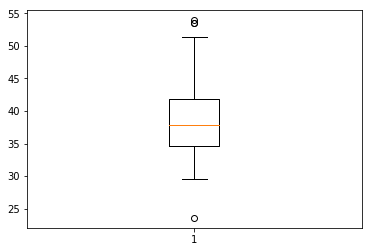

In [10]:
plt.boxplot(df_model.Ave)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
df_scale = df_model.drop(labels='Player', axis=1)

In [23]:
df_scale = scaler.fit_transform(df_scale)

In [25]:
df_scale = pd.DataFrame(df_scale)

In [26]:
df_scale.columns = ['Ave','SR']

In [27]:
df_scale.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [28]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
hopkins(df_scale)

0.6714451234155208

In [31]:
from sklearn.cluster import KMeans

In [32]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
model_clus5.labels_

array([2, 2, 2, 1, 3, 0, 0, 0, 0, 2, 2, 0, 1, 4, 3, 4, 3, 2, 2, 0, 2, 0,
       0, 0, 1, 4, 2, 1, 3, 2, 3, 3, 0, 3, 4, 3, 3, 2, 4, 0, 3, 3, 4, 3,
       3, 3, 2, 3, 3, 2, 1, 0, 0, 3, 3, 3, 0, 2, 3, 2, 3, 1, 0, 2, 4, 2,
       3, 0, 2, 3, 2, 3, 3, 3, 0, 0, 3, 2, 3])

In [35]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_scale)
    sse_.append([k, silhouette_score(df_scale, kmeans.labels_)])

In [36]:
sse_

[[2, 0.37632823237612395],
 [3, 0.37185804193936567],
 [4, 0.37643428930824785],
 [5, 0.36941231708738775],
 [6, 0.3795907469939997],
 [7, 0.38301845780271],
 [8, 0.38918689281599034],
 [9, 0.3759312403877366],
 [10, 0.3579812163384604],
 [11, 0.32950771571656295],
 [12, 0.3280689965077076],
 [13, 0.3178590086096764],
 [14, 0.32149682907058125]]

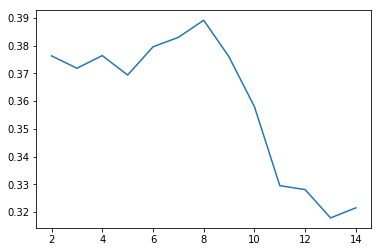

In [37]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

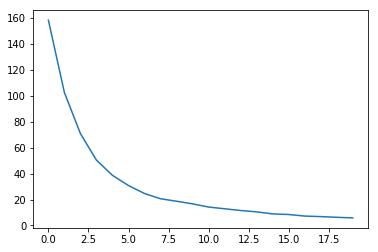

In [38]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [40]:
# Kmeans with K=5
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
model_clus4.labels_

array([2, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 2, 0, 3, 1, 1, 3, 1,
       0, 1, 3, 2, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0])

In [42]:
df_model['clusterId'] = model_clus4.labels_

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_model.to_csv('cricket_cluster.csv')